<a href="https://colab.research.google.com/github/osgeokr/kari-sdm/blob/main/008_Pseudo-absence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q -U rasterio

In [ ]:
import pandas as pd, geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
import os
import numpy as np
import random

from google.colab import drive
from google.colab import files
from matplotlib.colors import LinearSegmentedColormap
from shapely.geometry import Point, Polygon

In [ ]:
# Google Drive를 마운트
drive.mount('/content/drive')

# 경로 설정
folder_path = "/content/drive/My Drive/kari-sdm"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# DEM
img_path = os.path.join(folder_path, "DEM_scaled.tif")
with rasterio.open(img_path) as src:
    dem_array = src.read(1)
    transform = src.transform
    crs = src.crs

# SLP
img_path = os.path.join(folder_path, "SLP_scaled.tif")
slp_array = rasterio.open(img_path).read(1)

# ASP
img_path = os.path.join(folder_path, "ASP_scaled.tif")
asp_array = rasterio.open(img_path).read(1)

# NDBI
img_path = os.path.join(folder_path, "NDBI_scaled.tif")
ndbi_array = rasterio.open(img_path).read(1)

# NDVI
img_path = os.path.join(folder_path, "NDVI_scaled.tif")
ndvi_array = rasterio.open(img_path).read(1)

# NDWI
img_path = os.path.join(folder_path, "NDWI_scaled.tif")
ndwi_array = rasterio.open(img_path).read(1)

# Canopy Height
img_path = os.path.join(folder_path, "CHT_scaled.tif")
cht_array = rasterio.open(img_path).read(1)

# Tree Canopy Cover
img_path = os.path.join(folder_path, "TCC_scaled.tif")
tcc_array = rasterio.open(img_path).read(1)

# 래스터 배열에서 값이 유효한 위치를 선택하여 모델 예측 수행
valid_mask = (
    ~np.isnan(dem_array)
    & ~np.isnan(slp_array)
    & ~np.isnan(asp_array)
    & ~np.isnan(ndbi_array)
    & ~np.isnan(ndvi_array)
    & ~np.isnan(ndwi_array)
    & ~np.isnan(cht_array)
    & ~np.isnan(tcc_array)
)

# valid_mask를 uint8로 변환
valid_mask = valid_mask.astype(np.uint8)

# valid_mask를 Google Drive에 TIFF 파일로 저장
output_path = os.path.join(folder_path, "VALID_MASK.tif")

with rasterio.open(
    output_path,
    'w',
    driver='GTiff',
    height=valid_mask.shape[0],
    width=valid_mask.shape[1],
    count=1,
    dtype=valid_mask.dtype,
    crs=crs,
    transform=transform
) as dst:
    dst.write(valid_mask.astype(rasterio.uint8), 1)

print(f"VALID_MASK saved to {output_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
VALID_MASK saved to /content/drive/My Drive/kari-sdm/VALID_MASK.tif


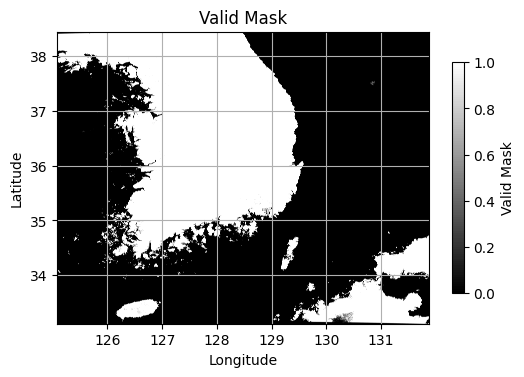

In [ ]:
# 경로 설정
img_path = os.path.join(folder_path, "VALID_MASK.tif")

# 이미지 데이터 읽기
with rasterio.open(img_path) as src:
    img_data = src.read(1)  # 첫 번째 밴드 읽기
    img_extent = src.bounds  # 이미지의 범위 가져오기
    img_transform = src.transform  # 변환 정보 가져오기
    img_meta = src.meta.copy()  # 메타데이터 복사

# 사용자 정의 컬러맵 생성
colors = ['black', 'white']
cmap_name = 'custom_cmap'
cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=100)

# 플롯 설정
fig, ax = plt.subplots(figsize=(6, 6))

# 이미지 데이터 플롯 (마스킹 적용)
img_plot = ax.imshow(
    img_data,
    cmap=cmap,
    extent=[img_extent.left, img_extent.right, img_extent.bottom, img_extent.top],
    origin="upper"
)

# 컬러바(범례) 추가
cbar = fig.colorbar(img_plot, ax=ax, orientation='vertical', shrink=0.5)
cbar.set_label('Valid Mask')

# 제목, 축 레이블, 그리드 설정
plt.title("Valid Mask")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)

# 좌표 비율 유지
ax.set_aspect("equal", "box")

# 플롯 표시
plt.show()

In [ ]:
!wget https://github.com/osgeokr/kari-sdm/raw/main/presence.gpkg -O presence.gpkg
presence_gdf = gpd.read_file('presence.gpkg')
presence_gdf.head(1)

--2024-08-18 11:40:39--  https://github.com/osgeokr/kari-sdm/raw/main/presence.gpkg
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/osgeokr/kari-sdm/main/presence.gpkg [following]
--2024-08-18 11:40:39--  https://raw.githubusercontent.com/osgeokr/kari-sdm/main/presence.gpkg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 118784 (116K) [application/octet-stream]
Saving to: ‘presence.gpkg’

presence.gpkg       100%[===================>] 116.00K  --.-KB/s    in 0.03s   

2024-08-18 11:40:39 (4.45 MB/s) - ‘presence.gpkg’ saved [118784/118784]



,species,publishingOrgKey,year,month,eventDate,DW_1,raster_value_1,geometry
0,Pitta nympha,e2e717bf-551a-4917-bdc9-4fa0f342c530,2023,5,2023-05-27,1.0,1.208385,POINT (126.69344 33.36925)


In [ ]:
file_path = '/content/drive/My Drive/kari-sdm/KR.gpkg'
kr_gdf = gpd.read_file(file_path)

In [ ]:
# presence 좌표계를 투영 좌표계로 변경
presence_gdf = presence_gdf.to_crs(epsg=5179)
kr_gdf = kr_gdf.to_crs(epsg=5179)

# presence 포인트에 대해 1000m 버퍼 생성
buffer_distance = 1000  # 1000m
presence_buffered = presence_gdf.copy()
presence_buffered['geometry'] = presence_buffered.geometry.buffer(buffer_distance)

# KR에서 presence의 버퍼 영역 제외
kr_without_presence = gpd.overlay(kr_gdf, presence_buffered, how='difference')

# absence 포인트 생성
num_absence_points = len(presence_gdf)
absence_points = []

for _ in range(num_absence_points):
    # kr에서 버퍼 영역이 제외된 부분 중 랜덤 포인트 선택
    polygon = kr_without_presence.sample(1).iloc[0].geometry
    minx, miny, maxx, maxy = polygon.bounds
    while True:
        random_point = Point(random.uniform(minx, maxx), random.uniform(miny, maxy))
        if polygon.contains(random_point):
            absence_points.append(random_point)
            break

# absence 포인트를 GeoDataFrame으로 변환
absence_gdf = gpd.GeoDataFrame(geometry=absence_points, crs=kr_gdf.crs)
absence_gdf = absence_gdf.to_crs(epsg=4326)

# absence 파일 저장
absence_gpkg_path = os.path.join(folder_path, 'absence.gpkg')
absence_gdf.to_file(absence_gpkg_path, driver='GPKG')

# absence_mask 파일 저장
kr_without_presence = kr_without_presence.to_crs(epsg=4326)
absence_mask_gpkg_path = os.path.join(folder_path, 'absence_mask.gpkg')
kr_without_presence.to_file(absence_mask_gpkg_path, driver='GPKG')

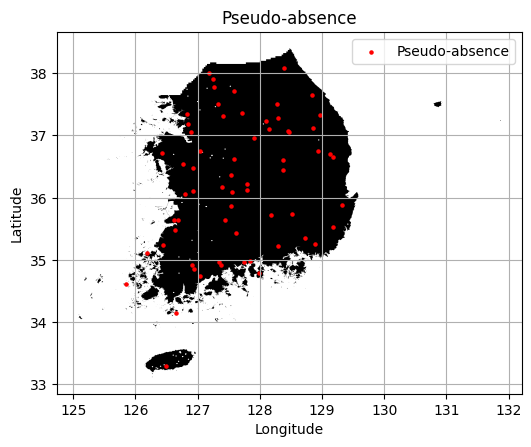

In [ ]:
absence_mask_gdf = gpd.read_file(os.path.join(folder_path, 'absence_mask.gpkg'))
absence_gdf = gpd.read_file(os.path.join(folder_path, 'absence.gpkg'))

# 플롯 설정
fig, ax = plt.subplots(figsize=(6, 6))
# ax.set_facecolor('black')

# 대한민국 경계
absence_mask_gdf.plot(ax=ax, color='black')

# absence 데이터 플롯
absence_gdf.plot(ax=ax, marker='o', color='red', markersize=5, label='Pseudo-absence')

# 범례, 제목, 축 레이블, 그리드 설정
plt.legend()
plt.title('Pseudo-absence')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)

ax.set_aspect('equal', 'box')

# 플롯 표시
plt.show()

In [ ]:
# presence 데이터
presence_gdf = presence_gdf.to_crs(epsg=4326)
presence_gdf['species'] = 'Pitta nympha'
presence_gdf['status'] = 1

# absence 데이터
absence_gdf['species'] = 'Pitta nympha'
absence_gdf['status'] = 0

# 필요한 필드만 선택
presence = presence_gdf[['species', 'status', 'geometry']]
absence = absence_gdf[['species', 'status', 'geometry']]

# presence와 absence 데이터를 병합
gdf_pa_dw = pd.concat([presence, absence], ignore_index=True)

# GeoPackage 파일로 저장
output_path = os.path.join(folder_path, 'pitta_nympha_pa_dw.gpkg')
gdf_pa_dw.to_file(output_path, layer='data', driver="GPKG")

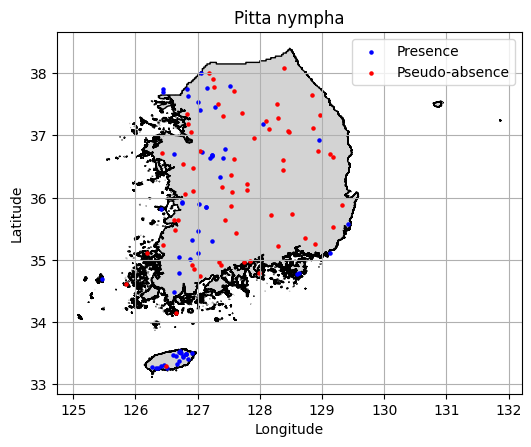

In [ ]:
gdf = gpd.read_file(os.path.join(folder_path, 'pitta_nympha_pa_dw.gpkg'))
kr = gpd.read_file(os.path.join(folder_path, 'KR.gpkg'))

# presence와 absence로 데이터를 분리
presence = gdf[gdf['status'] == 1]
absence = gdf[gdf['status'] == 0]

# 플롯 설정
fig, ax = plt.subplots(figsize=(6, 6))

# 대한민국 경계
kr.plot(ax=ax, color='lightgrey', edgecolor='black')

# presence 데이터 플롯
presence.plot(ax=ax, marker='o', color='blue', markersize=5, label='Presence')

# absence 데이터 플롯
absence.plot(ax=ax, marker='o', color='red', markersize=5, label='Pseudo-absence')

# 범례, 제목, 축 레이블, 그리드 설정
plt.legend()
plt.title('Pitta nympha')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)

ax.set_aspect('equal', 'box')

# 플롯 표시
plt.show()